In [1]:
import numpy as np
import lbg_forecast.nz as nz
import matplotlib.pyplot as plt
import scipy as sc

In [2]:
nruns=8
run='hpc_pop_4m'

selected_spsp = []
nzs = []
ndens = []
for i in range(nruns):
    selected_spsp.append(np.load("sps_parameter_samples/selected_sps_"+run+"_"+str(i)+".npy", allow_pickle=True))
    nzs.append(np.load("nz_samples/nz_"+run+"_"+str(i)+".npy", allow_pickle=True))
    ndens.append(np.load("nz_samples/n_detected_"+run+"_"+str(i)+".npy"))

selected_spsp = np.vstack(selected_spsp)
nzs = np.vstack(nzs)
ndens = np.vstack(ndens)
print(selected_spsp.shape, nzs.shape, ndens.shape)

(128, 3) (128, 3) (128, 3)


In [3]:
real = 0
ndropouts=3
means = np.empty((128, 3))
for drop in range(ndropouts):
    for real in range(nzs.shape[0]):
        mean_redshift  = np.mean(nzs[real][drop])
        means[real][drop] = mean_redshift

np.save("nz_samples/means_nz_"+run+".npy", means)

In [4]:
test = np.load("nz_samples/means_nz_"+run+".npy")

In [5]:
def plot_nzs(axes, nzs, mean, density, a, p, **kwargs):

    ndropouts = 3

    percentile=p

    bin_step = 0.2
    bin_start = 0
    bin_end = 7

    bins = np.arange(bin_start, bin_end, bin_step)
    colours = ['blue', 'green', 'red']
    labels = ['$u$-dropouts', "$g$-dropouts", "$r$-dropouts"]
    lss=['--', '-.', '-']


    samples=100
    grid = np.arange(bin_start, bin_end-bin_step, bin_step/samples)

    for drop in range(ndropouts):

        values = []
        for ind in range(nzs.shape[0]):
            hist = np.histogram(nzs[ind][drop], density=density, bins=bins)
            oversampled_values = np.repeat(hist[0], samples)
            values.append(oversampled_values)

        values = np.vstack((np.array(values)))
        mean_at_grid_point = np.mean(values, axis=0)
        percentile_at_point = np.percentile(values, [100-percentile, 50, percentile], axis=0)
        if(mean):
            axes.plot(grid, mean_at_grid_point, c=colours[drop], **kwargs, label=labels[drop], ls=lss[drop], lw=2)
        axes.fill_between(grid, percentile_at_point[0, :], percentile_at_point[2, :], alpha=a, color=colours[drop], lw=0)

    axes.legend(fontsize=18, ncol=3, loc='upper left')
    axes.set_xlabel("Redshift $z$", fontsize=24)
    axes.set_ylabel("$p$($z$|Dropout Selection, SPS Model)", fontsize=24)
    axes.set_xticks(np.arange(0, 7, 0.5))
    axes.tick_params('x', labelsize=24)
    axes.tick_params('y', labelsize=24)
    axes.grid(alpha=0.2)
    axes.set_xlim(0, 6)
    axes.set_ylim(0, 1.8)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


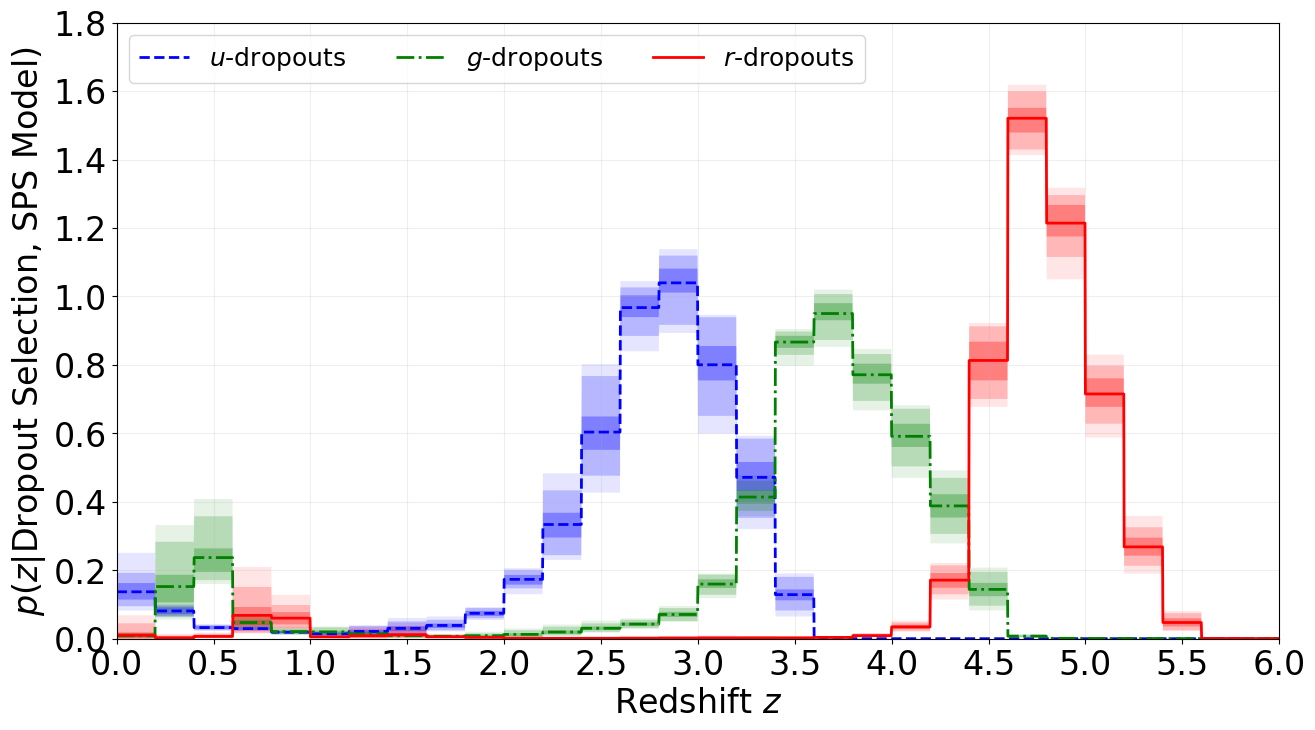

In [6]:
density=True
fig1, axes = plt.subplots(1, 1, figsize=(15,8), sharex=False, sharey=False)
plot_nzs(axes, nzs, mean=False, density=density, ls='--', a=0.1, p=99.7)
plot_nzs(axes, nzs, mean=False, density=density, ls='--', a=0.2, p=97.5)
plot_nzs(axes, nzs, mean=True, density=density, a=0.3, p=84)

In [7]:
def get_mass_less_8(seleced_sps, real):

    umasses = np.log10(np.squeeze(seleced_sps[real, 0])[:, -1])
    gmasses = np.log10(np.squeeze(seleced_sps[real, 1])[:, -1])
    rmasses = np.log10(np.squeeze(seleced_sps[real, 2])[:, -1])

    umasses8 = umasses[np.where(umasses < 8)[0]]
    gmasses8 = gmasses[np.where(gmasses < 8)[0]]
    rmasses8 = rmasses[np.where(rmasses < 8)[0]]

    upless8 = (len(umasses8)/len(umasses))*100
    gpless8 = (len(gmasses8)/len(gmasses))*100
    rpless8 = (len(rmasses8)/len(rmasses))*100

    return upless8, gpless8, rpless8

per_mass = np.zeros(3)
for indx in range(nzs.shape[0]):
    per_mass+=np.array(get_mass_less_8(selected_spsp, indx))

per_mass/nzs.shape[0]

array([2.88667589, 2.59820639, 0.38263966])

In [8]:
percentile=84
mean = np.mean(ndens, axis=0)
std =  np.std(ndens, axis=0)
errl = np.percentile(ndens, 100-percentile, axis=0)
errh = np.percentile(ndens, percentile, axis=0)

print("u-dropout number density (std): ",mean[0],"+/-",std[0],"deg-2")
print("g-dropout number density (std): ",mean[1],"+/-",std[1],"deg-2")
print("r-dropout number density (std): ",mean[2],"+/-",std[2],"deg-2")


ww_mag = [25.7022696929239, 26.503337783711615, 25.80373831775701]
ww_n = [14221.361534067577, 13866.10741847241, 1318.8615021762366]

print("W&W u-dropout number density: ",ww_n[0],"deg-2")
print("W&W g-dropout number density: ",ww_n[1],"deg-2")
print("W&W r-dropout number density: ",ww_n[2],"deg-2")

u-dropout number density (std):  8394.915250477154 +/- 1051.2993565826778 deg-2
g-dropout number density (std):  13726.820546777351 +/- 1531.1622975665491 deg-2
r-dropout number density (std):  1109.4410738974782 +/- 284.22833119379493 deg-2
W&W u-dropout number density:  14221.361534067577 deg-2
W&W g-dropout number density:  13866.10741847241 deg-2
W&W r-dropout number density:  1318.8615021762366 deg-2


u-dropout Interloper Fraction: 9.563826690353581 +/- 1.1329765295655148
g-dropout Interloper Fraction: 10.506560017356374 +/- 2.384773619043712
r-dropout Interloper Fraction: 3.6717847371710484 +/- 1.4052856023622988


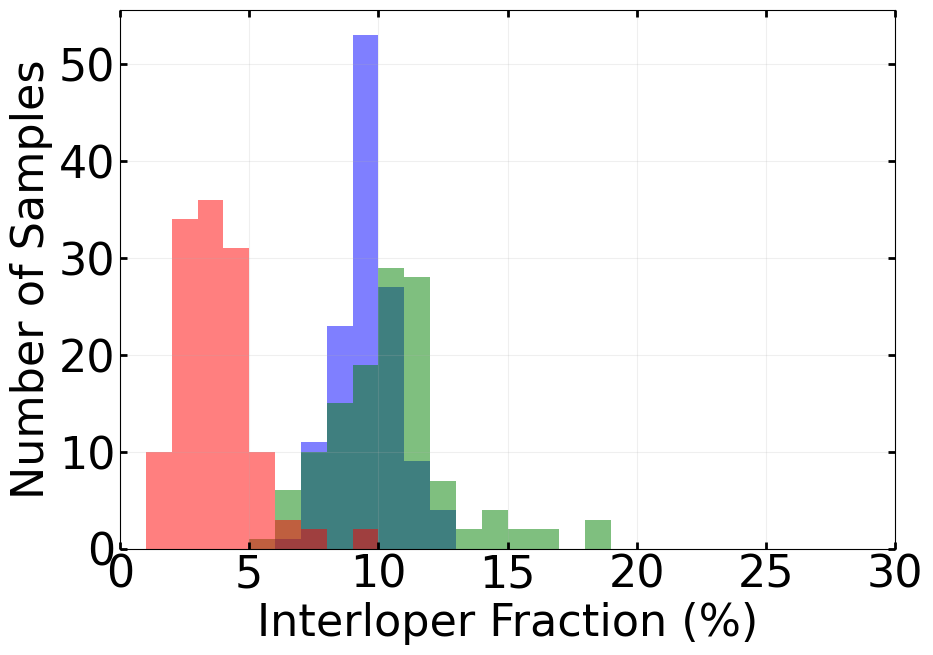

In [9]:
def interlopers(samples):
    nint = len(np.where(samples<2.0)[0])
    ntot = len(samples)
    return (nint/ntot)*100

f, ax = plt.subplots(1, 1, figsize=(10, 7))

uints = []
gints = []
rints = []
for n in range(nzs.shape[0]):
    uints.append(interlopers(nzs[n][0]))
    gints.append(interlopers(nzs[n][1]))
    rints.append(interlopers(nzs[n][2]))

nbins = np.arange(0.0, 100, 1)
histogram = ax.hist(uints, alpha=0.5, bins=nbins, color='blue')
histogram = ax.hist(gints, alpha=0.5, bins=nbins, color='green')
histogram = ax.hist(rints, alpha=0.5, bins=nbins, color='red')

uints_mean = np.mean(uints)
uints_std = np.std(uints)
gints_mean = np.mean(gints)
gints_std = np.std(gints)
rints_mean = np.mean(rints)
rints_std = np.std(rints)

print("u-dropout Interloper Fraction:", uints_mean,"+/-",uints_std)
print("g-dropout Interloper Fraction:", gints_mean,"+/-",gints_std)
print("r-dropout Interloper Fraction:", rints_mean,"+/-",rints_std)

ax.set_xticks(np.arange(0, 35, 5))

ax.set_xlim(0, 30)
ax.grid(alpha=0.2)
ax.set_xlabel("Interloper Fraction (%)", fontsize=32)
ax.set_ylabel("Number of Samples", fontsize=32)
ax.tick_params('x', labelsize=32, width=2, size=5, direction='in', top=True)
ax.tick_params('y', labelsize=32, width=2, size=5, direction='in', right=True)


Removed no burn in


((-0.25415838644279864, 3.865090013454045),
 (-0.128641406377998, 1.9986589140057895))

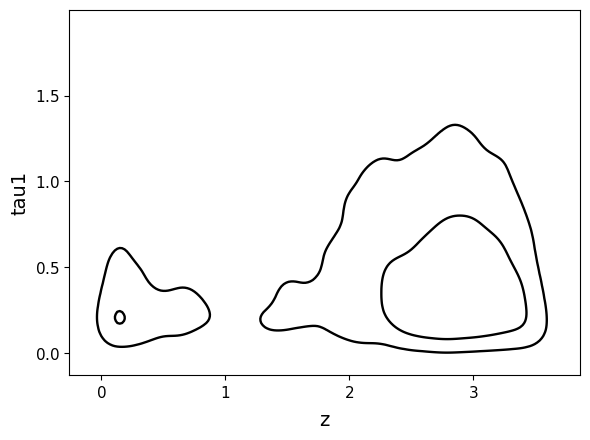

In [10]:
from getdist import plots
from getdist import MCSamples

real=0
taus = np.squeeze(selected_spsp[real, 0])[:, 2:4]
zs = np.squeeze(selected_spsp[real, 0])[:, 0]

mcsamp = MCSamples(samples=np.vstack((zs, taus[:, 0])).T, names=['z', 'tau1'])
g = plots.get_single_plotter()
g.plot_2d([mcsamp], 'z', 'tau1')

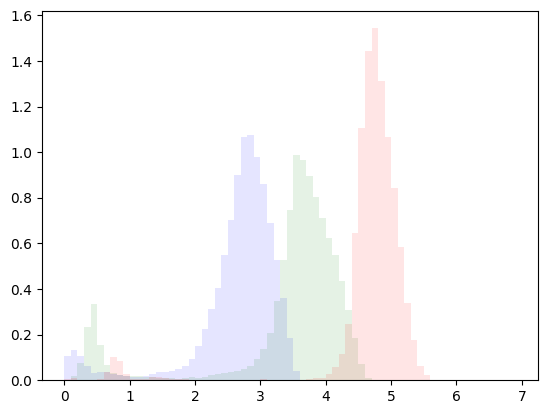

In [11]:
bins = nz.default_nz_bins()
indx=np.random.randint(0, nzs.shape[0])
hist = plt.hist(nzs[indx][0], density=True, bins=bins, alpha = 0.1, color='blue')
hist = plt.hist(nzs[indx][1], density=True, bins=bins, alpha = 0.1, color='green')
hist = plt.hist(nzs[indx][2], density=True, bins=bins, alpha = 0.1, color='red')

In [12]:
#np.save("redshifts/emulated_redshifts_0.npy", nzs)